In [82]:
import zipfile
import os
import glob
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel, RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# Specify the path to the ZIP file and the path where you want to extract it
zip_path = 'C:\\Users\\Soham\\Documents\\GitHub\\Daphnet-Freezing-of-Gait\\dataset_fog_release.zip'
extract_path = 'C:\\Users\\Soham\\Documents\\GitHub\\Daphnet-Freezing-of-Gait\\'

# Open the ZIP file and extract its contents to the specified location
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path to directory containing text files
dir_path = "C:\\Users\\Soham\\Documents\\GitHub\\Daphnet-Freezing-of-Gait\\dataset_fog_release\\dataset"

# Pattern for selecting text files
file_pattern = "*.txt"

# Output file name
output_file = "combined_data.txt"

# Loop over text files and concatenate contents
with open(output_file, "w") as outfile:
    for file_path in glob.glob(os.path.join(dir_path, file_pattern)):
        with open(file_path, "r") as infile:
            outfile.write(infile.read())

# Read the text file into a DataFrame
df = pd.read_csv(output_file, sep=' ', header=None)

# Add column names to the DataFrame
df.columns = ['Time of sample in millisecond', 'Ankle (shank) acceleration - horizontal forward acceleration [mg]', 'Ankle (shank) acceleration - vertical [mg]', 'Ankle (shank) acceleration - horizontal lateral [mg]', 'Upper leg (thigh) acceleration - horizontal forward acceleration [mg]', 'Upper leg (thigh) acceleration - vertical [mg]', 'Upper leg (thigh) acceleration - horizontal lateral [mg]', 'Trunk acceleration - horizontal forward acceleration [mg]', 'Trunk acceleration - vertical [mg]', 'Trunk acceleration - horizontal lateral [mg]','Annotation [0, 1, or 2]']

# Drop the rows with annotation = 0
df = df.drop(df[df['Annotation [0, 1, or 2]'] == 0].index)


In [84]:
# Remove rows with missing or infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df.drop('Annotation [0, 1, or 2]', axis=1))

# Convert the normalized data back to a DataFrame
df_norm = pd.DataFrame(df_norm, columns=df.columns[:-1])

# Add the annotation column back to the DataFrame
df_norm['Annotation [0, 1, or 2]'] = df['Annotation [0, 1, or 2]']

# Print the first 5 rows of the normalized DataFrame
print(df_norm.head())


   Time of sample in millisecond  \
0                      -0.858085   
1                      -0.858061   
2                      -0.858036   
3                      -0.858013   
4                      -0.857988   

   Ankle (shank) acceleration - horizontal forward acceleration [mg]  \
0                                           0.117596                   
1                                           0.117596                   
2                                           0.135005                   
3                                           0.135005                   
4                                           0.169824                   

   Ankle (shank) acceleration - vertical [mg]  \
0                                   -0.018961   
1                                    0.008633   
2                                   -0.018961   
3                                    0.008633   
4                                   -0.018961   

   Ankle (shank) acceleration - horizontal lateral [mg]

In [85]:
print(df_norm.isnull().sum())
print(np.isinf(df_norm).sum())

Time of sample in millisecond                                                 0
Ankle (shank) acceleration - horizontal forward acceleration [mg]             0
Ankle (shank) acceleration - vertical [mg]                                    0
Ankle (shank) acceleration - horizontal lateral [mg]                          0
Upper leg (thigh) acceleration - horizontal forward acceleration [mg]         0
Upper leg (thigh) acceleration - vertical [mg]                                0
Upper leg (thigh) acceleration - horizontal lateral [mg]                      0
Trunk acceleration - horizontal forward acceleration [mg]                     0
Trunk acceleration - vertical [mg]                                            0
Trunk acceleration - horizontal lateral [mg]                                  0
Annotation [0, 1, or 2]                                                  461711
dtype: int64
Time of sample in millisecond                                            0
Ankle (shank) acceleration - hor

In [86]:
print(df.describe())


       Time of sample in millisecond  \
count                   1.140835e+06   
mean                    1.299566e+06   
std                     6.404573e+05   
min                     1.850000e+05   
25%                     7.892030e+05   
50%                     1.183046e+06   
75%                     1.774812e+06   
max                     2.930000e+06   

       Ankle (shank) acceleration - horizontal forward acceleration [mg]  \
count                                       1.140835e+06                   
mean                                       -9.754756e+01                   
std                                         5.744049e+02                   
min                                        -3.123400e+04                   
25%                                        -3.030000e+02                   
50%                                        -7.000000e+01                   
75%                                         1.210000e+02                   
max                            

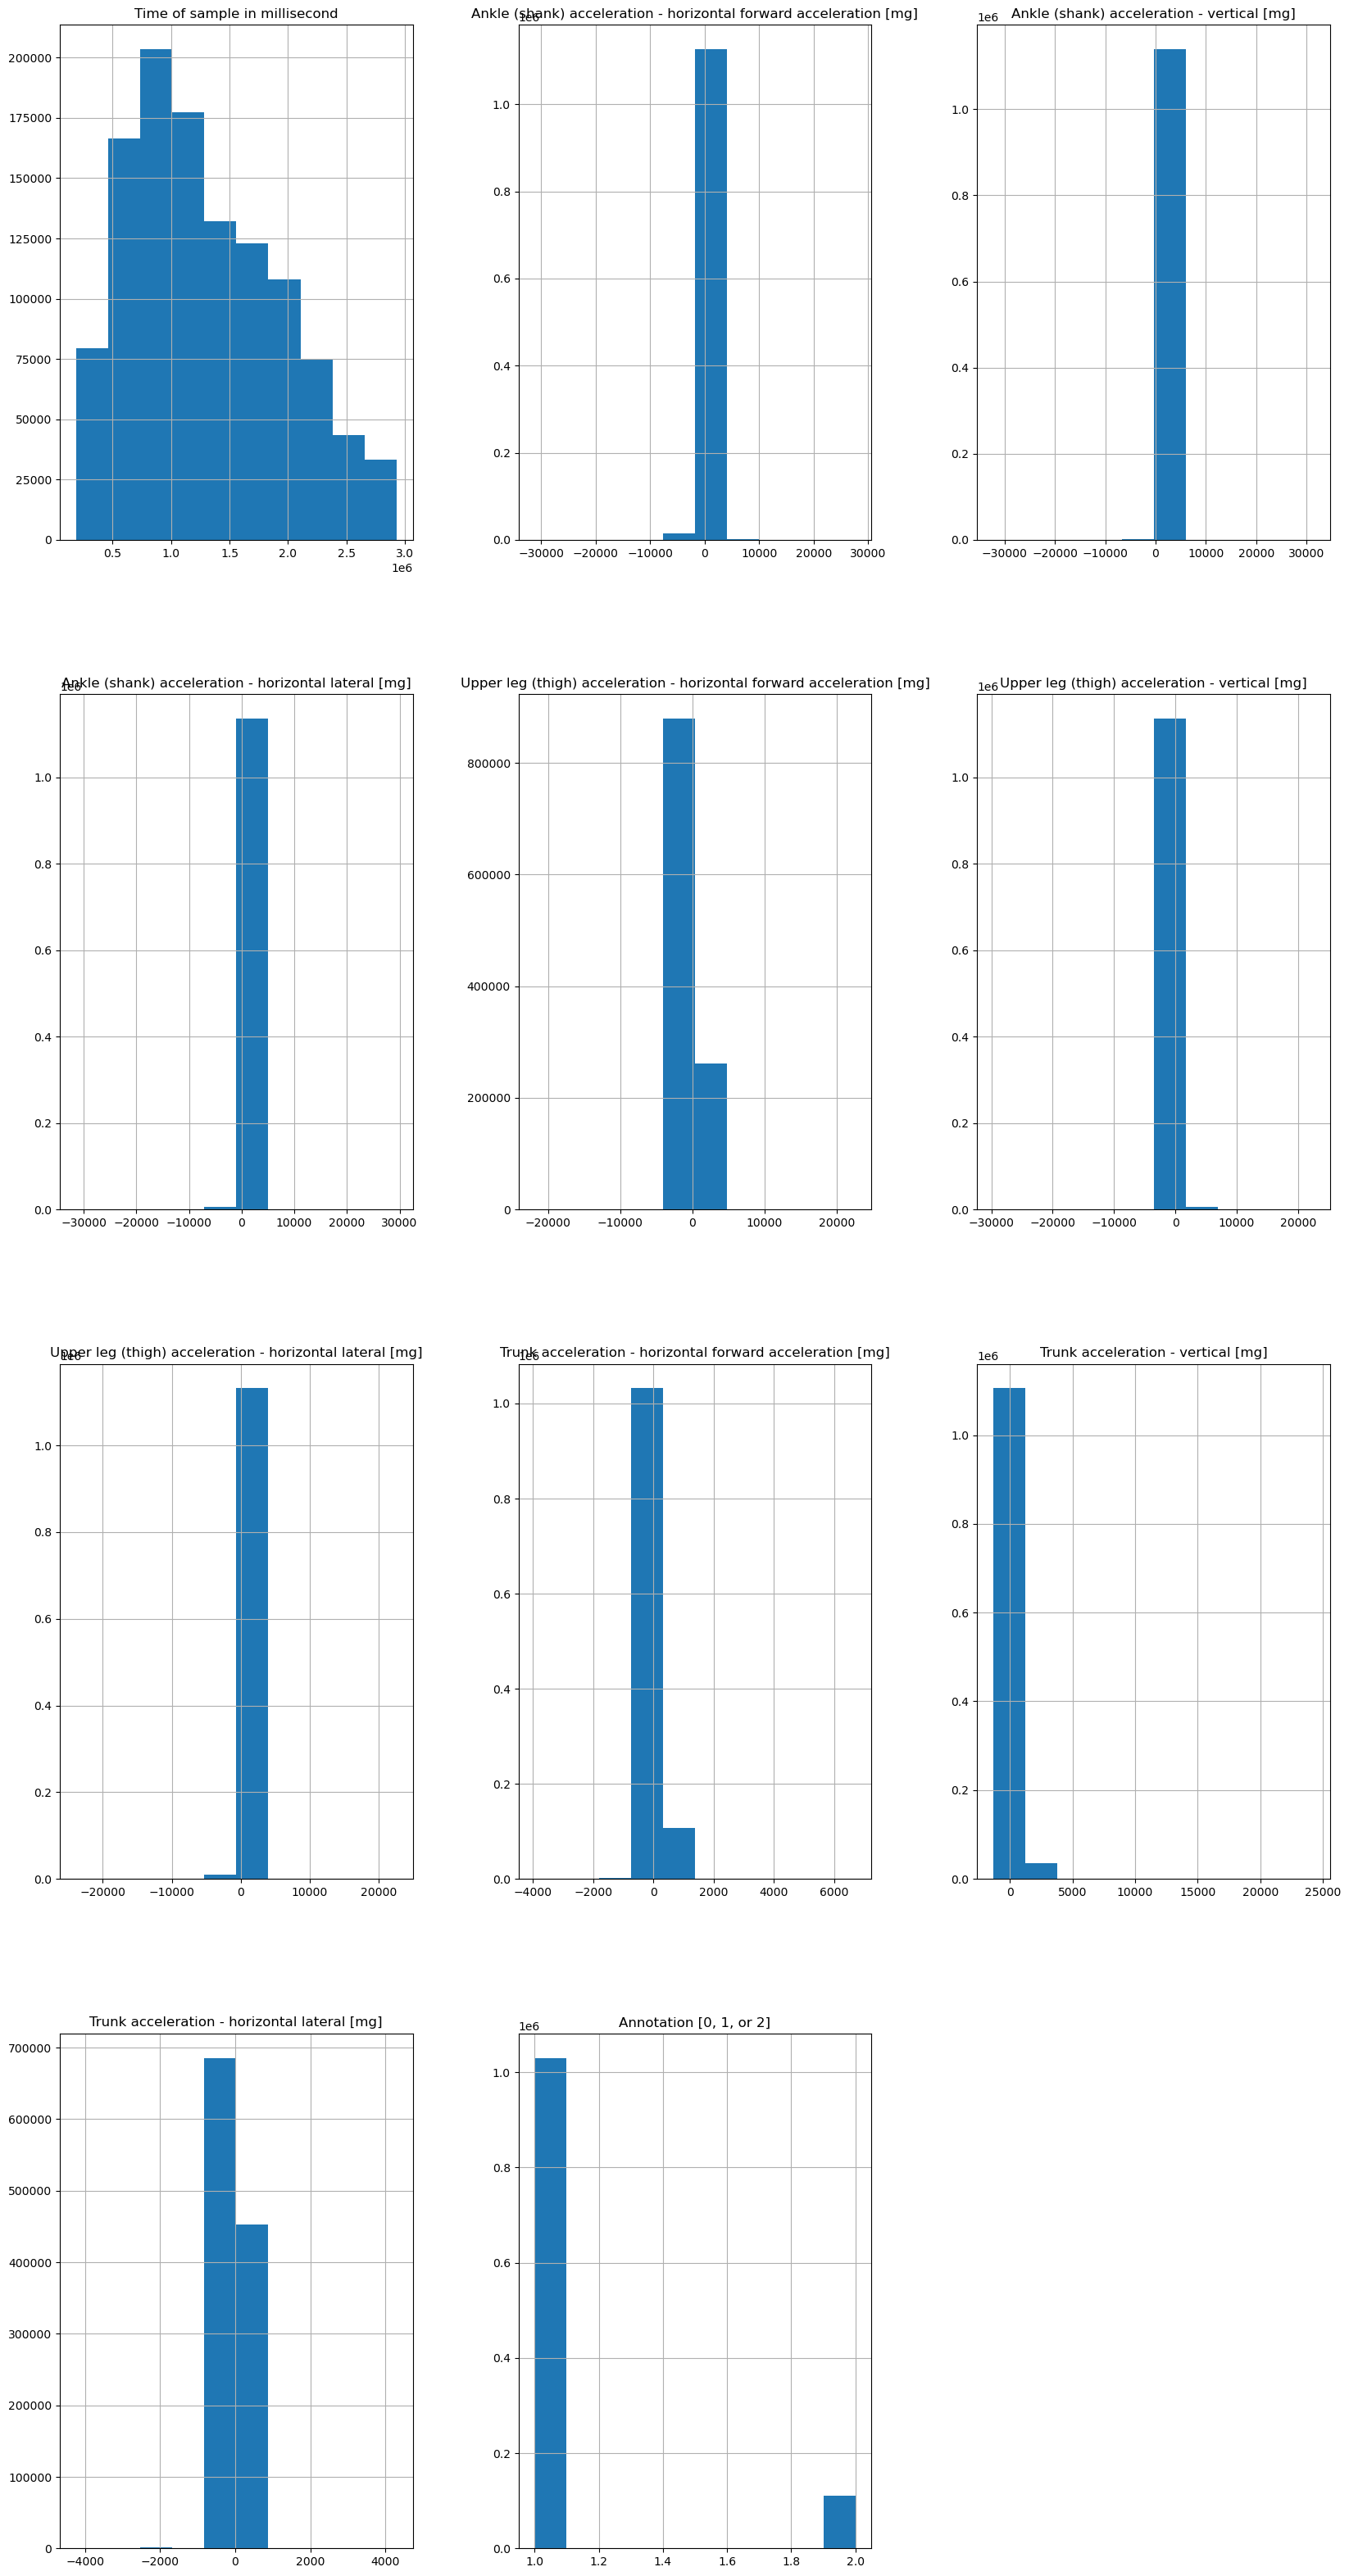

In [87]:
df.hist(figsize=(20,40))
plt.show()


This code is plotting a grouped bar chart of mean values for different features of two different annotations. The first part of the code groups the dataframe by the 'Annotation [0, 1, or 2]' column and calculates the mean values for each group. Then it prints the mean values for annotation 1 and annotation 2 using the loc function.

The second part of the code defines a list of columns to plot, gets the mean values for annotation 1 and annotation 2, and sets the width of each bar and the positions of the bars on the x-axis. Then it creates the figure and axes objects, and creates the grouped bar plot using the bar function. The x-axis labels, y-axis labels, title, and legend are added using the set_xlabel, set_ylabel, set_title, and legend functions. Finally, the plot is shown using the plt.show function.

Overall, this code is useful for comparing the mean values of different features between two different annotations, and visualizing the differences between them.

Mean values for annotation 1:
Time of sample in millisecond                                            1.318568e+06
Ankle (shank) acceleration - horizontal forward acceleration [mg]       -1.094772e+02
Ankle (shank) acceleration - vertical [mg]                               9.962012e+02
Ankle (shank) acceleration - horizontal lateral [mg]                     2.446432e+02
Upper leg (thigh) acceleration - horizontal forward acceleration [mg]    5.439395e+00
Upper leg (thigh) acceleration - vertical [mg]                           7.464752e+02
Upper leg (thigh) acceleration - horizontal lateral [mg]                 1.491623e+02
Trunk acceleration - horizontal forward acceleration [mg]                6.093165e+01
Trunk acceleration - vertical [mg]                                       9.544161e+02
Trunk acceleration - horizontal lateral [mg]                             2.719418e+01
Name: 1, dtype: float64

Mean values for annotation 2:
Time of sample in millisecond                          

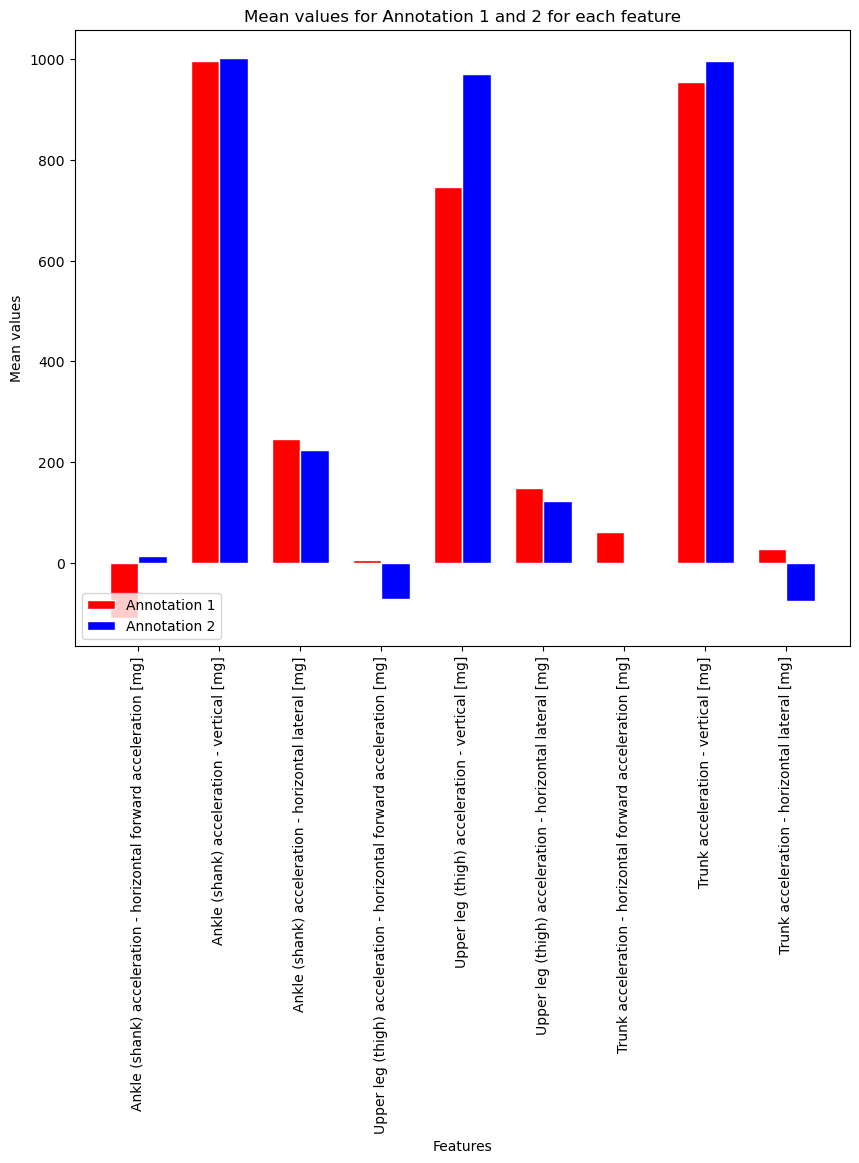

In [88]:
# Group the dataframe by the 'Annotation [0, 1, or 2]' column and calculate the mean values for each group
grouped = df.groupby('Annotation [0, 1, or 2]').mean()

# Print the mean values for annotation 1 and annotation 2
print('Mean values for annotation 1:')
print(grouped.loc[1])
print()
print('Mean values for annotation 2:')
print(grouped.loc[2])




# Define the list of columns to plot
columns_to_plot = ['Ankle (shank) acceleration - horizontal forward acceleration [mg]',
                   'Ankle (shank) acceleration - vertical [mg]',
                   'Ankle (shank) acceleration - horizontal lateral [mg]',
                   'Upper leg (thigh) acceleration - horizontal forward acceleration [mg]',
                   'Upper leg (thigh) acceleration - vertical [mg]',
                   'Upper leg (thigh) acceleration - horizontal lateral [mg]',
                   'Trunk acceleration - horizontal forward acceleration [mg]',
                   'Trunk acceleration - vertical [mg]',
                   'Trunk acceleration - horizontal lateral [mg]']

# Get the mean values for annotation 1 and annotation 2
mean_values_1 = grouped.loc[1, columns_to_plot].values
mean_values_2 = grouped.loc[2, columns_to_plot].values

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(columns_to_plot))
r2 = [x + bar_width for x in r1]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create the grouped bar plot
ax.bar(r1, mean_values_1, color='r', width=bar_width, edgecolor='white', label='Annotation 1')
ax.bar(r2, mean_values_2, color='b', width=bar_width, edgecolor='white', label='Annotation 2')

# Add labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Mean values')
ax.set_title('Mean values for Annotation 1 and 2 for each feature')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(columns_to_plot, rotation=90)
ax.legend()

# Show the plot
plt.show()


This code is performing a series of t-tests to compare the means of certain accelerometer features between two different annotations (annotation 1 and annotation 2) in a DataFrame. The DataFrame contains data from accelerometer sensors and a column indicating which annotation each row belongs to. The code first creates two separate dataframes for each annotation. Then, a list of features to compare is defined. The code then loops through each feature and performs a t-test to determine if there is a significant difference in means between the two annotations.

The t-test used depends on the result of the Levene's test, which tests the null hypothesis that the variances of the two populations are equal. If the p-value is less than 0.05, the variances are considered significantly different, and the Welch's t-test (which does not assume equal variances) is used. Otherwise, the Student's t-test (which assumes equal variances) is used. The results of each t-test are then printed to the console.

In [89]:

# Create two dataframes for annotations 1 and 2
annotation1 = df[df['Annotation [0, 1, or 2]'] == 1]
annotation2 = df[df['Annotation [0, 1, or 2]'] == 2]

# List of features to compare
features = ['Ankle (shank) acceleration - horizontal forward acceleration [mg]',
            'Ankle (shank) acceleration - vertical [mg]',
            'Ankle (shank) acceleration - horizontal lateral [mg]',
            'Upper leg (thigh) acceleration - horizontal forward acceleration [mg]',
            'Upper leg (thigh) acceleration - vertical [mg]',
            'Upper leg (thigh) acceleration - horizontal lateral [mg]',
            'Trunk acceleration - horizontal forward acceleration [mg]',
            'Trunk acceleration - vertical [mg]',
            'Trunk acceleration - horizontal lateral [mg]']

# Loop over features and perform t-tests
for feature in features:
    # Check if the variances are similar using the Levene's test
    _, p_value = levene(annotation1[feature], annotation2[feature])
    if p_value < 0.05:
        # Variances are significantly different, use Welch's t-test
        t_statistic, p_value = ttest_ind(annotation1[feature], annotation2[feature], equal_var=False)
    else:
        # Variances are similar, use Student's t-test
        t_statistic, p_value = ttest_ind(annotation1[feature], annotation2[feature], equal_var=True)

    print('Feature:', feature)
    print('Annotation 1 mean:', annotation1[feature].mean())
    print('Annotation 2 mean:', annotation2[feature].mean())
    print('t-statistic:', t_statistic)
    print('p-value:', p_value)
    print('------------------------')


Feature: Ankle (shank) acceleration - horizontal forward acceleration [mg]
Annotation 1 mean: -109.47720693170234
Annotation 2 mean: 13.371214514600352
t-statistic: -68.1890019953552
p-value: 0.0
------------------------
Feature: Ankle (shank) acceleration - vertical [mg]
Annotation 1 mean: 996.2011844085239
Annotation 2 mean: 1003.1021076860586
t-statistic: -5.776351164223857
p-value: 7.650711696930683e-09
------------------------
Feature: Ankle (shank) acceleration - horizontal lateral [mg]
Annotation 1 mean: 244.64317169069463
Annotation 2 mean: 223.8300311414
t-statistic: 22.82251298351458
p-value: 4.397632501095948e-115
------------------------
Feature: Upper leg (thigh) acceleration - horizontal forward acceleration [mg]
Annotation 1 mean: 5.439395174991505
Annotation 2 mean: -72.73344766890824
t-statistic: 50.04931001857707
p-value: 0.0
------------------------
Feature: Upper leg (thigh) acceleration - vertical [mg]
Annotation 1 mean: 746.4752079996117
Annotation 2 mean: 970.395

In [90]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1] # Target variable (Annotation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code trains an AdaBoost model with a decision tree as the base estimator to classify a dataset. It first initializes the decision tree and AdaBoost models. It then performs 10-fold cross-validation with feature selection to assess the model's performance. After that, it fits the AdaBoost model to the training data and uses it to make predictions on the test data. The code then computes the confusion matrix, sensitivity, specificity, F1-score, and AUC-ROC, and prints them to the console. Finally, it prints the model's accuracy.

In [91]:
# Initialize the C4.5 decision tree model
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Initialize the AdaBoost model with the C4.5 decision tree as the base estimator
abc = AdaBoostClassifier(base_estimator=dtc, random_state=42)

# Perform 10-fold cross-validation with feature selection
cv_scores = cross_val_score(abc, X_train, y_train, cv=10, scoring='accuracy')

# Fit the AdaBoost model to the training data
abc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = abc.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute sensitivity, specificity, F1-score, and AUC-ROC
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores, sensitivity, specificity, F1-score, and AUC-ROC
#print("Cross-validation accuracy:", np.mean(cv_scores))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)


This code initializes a Random Forest Classifier model with 100 estimators, fits it to the training data, and uses it to predict the test data. The code then computes the confusion matrix, sensitivity, specificity, F1-score, AUC-ROC, and accuracy of the model's predictions. The code also includes a commented-out line for performing 10-fold cross-validation with the Random Forest model, but it has been commented out because it takes way more time to perform with cross-validation.

In [ ]:


# Initialize the Random Forest model with 100 estimators
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation with the Random Forest model
#cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')

# Fit the Random Forest model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute sensitivity, specificity, F1-score, AUC-ROC, and accuracy
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores, sensitivity, specificity, F1-score, AUC-ROC, and accuracy
#print("Cross-validation AUC-ROC:", np.mean(cv_scores))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)


The code initializes and trains an AdaBoost model using a C4.5 decision tree as the base estimator. It then uses grid search cross-validation to find the best hyperparameters for the AdaBoost model, including the number of estimators, learning rate, and maximum depth of the decision trees.

Next, recursive feature elimination cross-validation is performed to select the most important features for the model. The grid search cross-validation object is then fit to the training data using only the selected features.

The best estimator is then used to make predictions on the test data, and various performance metrics are calculated, including sensitivity, specificity, F1-score, and AUC-ROC.

However, the code may currently be encountering errors that need to be resolved.

In [ ]:
# Initialize the C4.5 decision tree model
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Initialize the AdaBoost model with the C4.5 decision tree as the base estimator
abc = AdaBoostClassifier(base_estimator=dtc, random_state=42)

# Set the hyperparameter grid for the AdaBoost model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(abc, param_grid=param_grid, cv=10, scoring='accuracy')

# Initialize the recursive feature elimination cross-validation object
rfecv = RFECV(estimator=abc, step=1, cv=10, scoring='accuracy')

# Fit the recursive feature elimination object to the training data
rfecv.fit(X_train, y_train)

# Select the features from the training data
X_train_rfe = X_train[:, rfecv.support_]

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train_rfe, y_train)

# Select the best estimator from the grid search cross-validation object
best_abc = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_abc.predict(X_test[:, rfecv.support_])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute sensitivity, specificity, F1-score, and AUC-ROC
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores, sensitivity, specificity, F1-score, and AUC-ROC
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)
